In [2]:
import numpy as np
import pandas as pd

folder = "ml-latest-small/"
ratings_data = pd.read_csv(folder + "ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_names = pd.read_csv(folder + "movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data = pd.merge(ratings_data, movie_names, on="movieId")
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
movie_data.groupby("title")["rating"].mean().head(10)

title
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
'Tis the Season for Love (2015)            1.500000
'burbs, The (1989)                         3.176471
'night Mother (1986)                       3.000000
(500) Days of Summer (2009)                3.666667
*batteries not included (1987)             3.285714
Name: rating, dtype: float64

In [7]:
movie_data.groupby("title")["rating"].mean().sort_values(ascending=False).head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [10]:
ratings_mean_count = pd.DataFrame(movie_data.groupby("title")["rating"].mean())
ratings_mean_count["rating_counts"] = pd.DataFrame(movie_data.groupby("title")["rating"].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


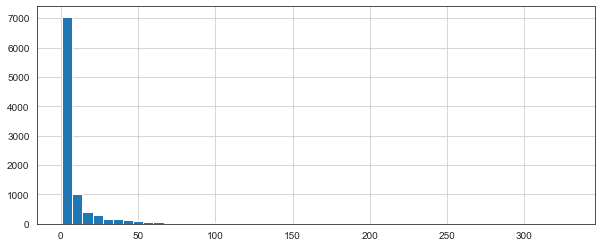

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

plt.figure(figsize=(10, 4))
ratings_mean_count["rating_counts"].hist(bins=50);

<AxesSubplot:>

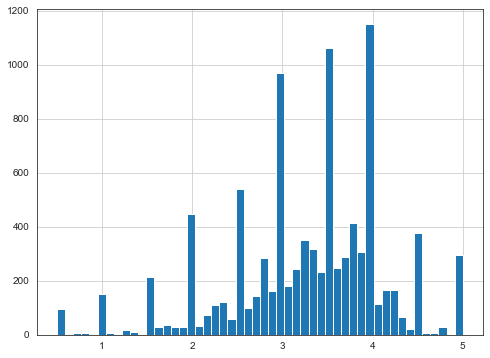

In [15]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

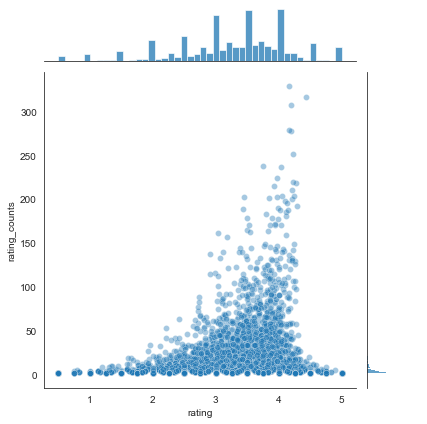

In [16]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [17]:
user_movie_rating = movie_data.pivot_table(index="userId", columns="title", values="rating")
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
forrest_gump_ratings = user_movie_rating["Forrest Gump (1994)"]
forrest_gump_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [22]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=["correlation"])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

/Users/louisrossi/opt/anaconda3/envs/w10/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/louisrossi/opt/anaconda3/envs/w10/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [24]:
corr_forrest_gump.sort_values("correlation", ascending=False).head(10)

,correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


In [25]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count["rating_counts"])
corr_forrest_gump.head()

,correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [26]:
corr_forrest_gump[corr_forrest_gump["rating_counts"] > 100].sort_values("correlation", ascending=False).head(10)

,correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102
